# Exercises in linear regression

## Exercise 1

Load in the "EnergyEfficiency.csv" data (on Moodle). It is data about energy efficiency of buildings, more specifically it is about predicting the heating load and cooling load of building based on a set of features about the buildings. It is retrieved from UCI Machine Learning Repository: [Energy efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency).

Answer the following questions:
1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.
2. Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?
3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?
4. Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).
5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?
6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.
7. Evaluate how good your simple linear regression model is. Hint: ½Chose one or several measures to evaluate your model.

In [73]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

In [8]:
df = pd.read_csv('EnergyEfficiency.csv')
print(df.head())
df.describe()

   RelativeCompactness  SurfaceArea  WallArea  RoofArea  OverallHeight  \
0                 0.98        514.5     294.0    110.25            7.0   
1                 0.98        514.5     294.0    110.25            7.0   
2                 0.98        514.5     294.0    110.25            7.0   
3                 0.98        514.5     294.0    110.25            7.0   
4                 0.90        563.5     318.5    122.50            7.0   

   Orientation  GlazingArea  GlazingAreaDistribution  HeatingLoad  CoolingLoad  
0            2          0.0                        0        15.55        21.33  
1            3          0.0                        0        15.55        21.33  
2            4          0.0                        0        15.55        21.33  
3            5          0.0                        0        15.55        21.33  
4            2          0.0                        0        20.84        28.28  


,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


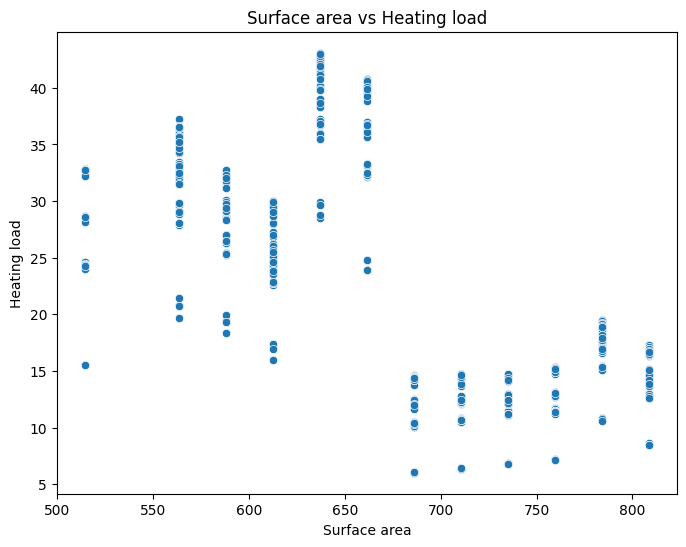

In [82]:
plt.figure(figsize=(8,6))

sns.scatterplot(x = "SurfaceArea", y = "HeatingLoad", data=df)
plt.title("Surface area vs Heating load")
plt.xlabel("Surface area")
plt.ylabel("Heating load")
plt.show()

looking at the scatterplot there seems to be a weak correlation, but lets calculate if this is actually the case 

Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?

In [58]:
# Compute Pearson correlation coefficient and p-value
stats.pearsonr(df["SurfaceArea"], df["HeatingLoad"])

PearsonRResult(statistic=np.float64(-0.6581202267776216), pvalue=np.float64(1.6869072902149069e-96))

looking at the results from the plot i would have said that there was a weak correlation but after calculating the pearson correlation it seems the relationship has more of a moderate correlation, and also a very significant relationship 

Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?

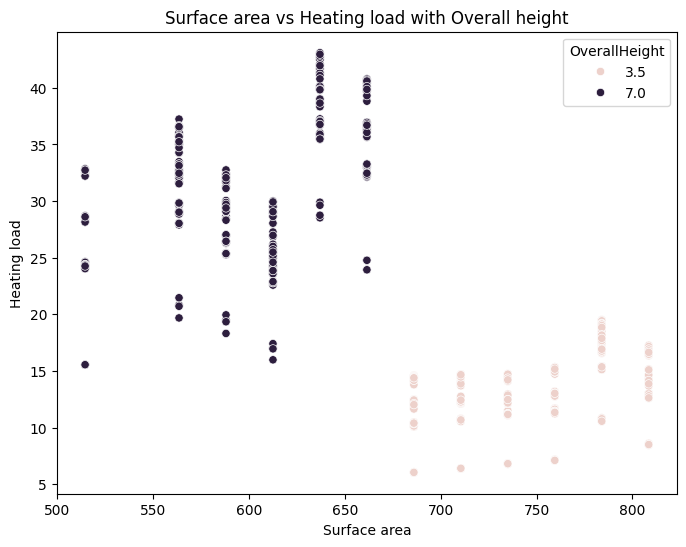

In [83]:
plt.figure(figsize=(8,6))

sns.scatterplot(x = "SurfaceArea", y = "HeatingLoad", hue = "OverallHeight" , data = df)
plt.title("Surface area vs Heating load with Overall height")
plt.xlabel("Surface area")
plt.ylabel("Heating load")
plt.show()

looking at the scatterplot, after adding overallheight to the hue, it makes a lot more sense why it looks like that. this makes the correlation make more sense 

now lets train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).

In [80]:
# Define X (independent variable) and y (dependent variable)
X = df[["SurfaceArea"]]  # Needs to be 2D for sklearn
y = df["HeatingLoad"]


X = sm.add_constant(X)


# Create the regression model
model = sm.OLS(y,X).fit()


# Train the model on the training data
print(model.params)

const          72.945382
SurfaceArea    -0.075387
dtype: float64


What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?

looking at the calculated coefficients, HeatingLoad(y) will be at 72,945 when SurfaceArea(x) is at 0. Whenever SurfaceArea(x) increases by one, HeatingLoad(y) will change by a factor of -0.0753. This also confirms a reverse correlation.

Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.

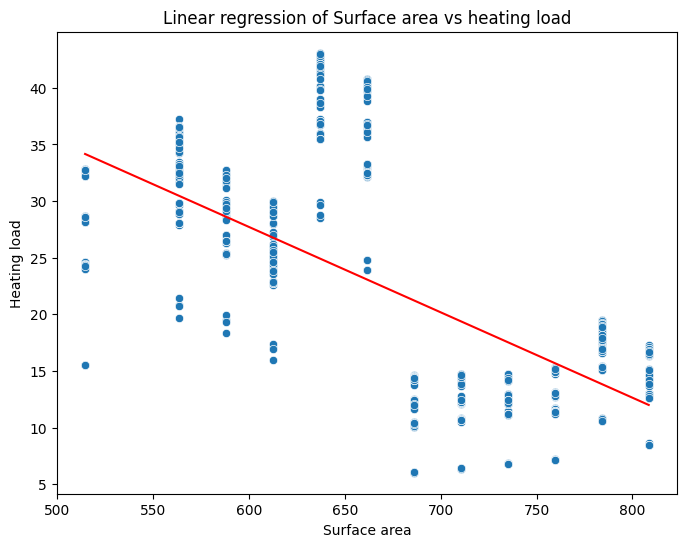

In [93]:
pred_y = model.params["const"] + model.params["SurfaceArea"] * df["SurfaceArea"]

plt.figure(figsize=(8,6))

sns.scatterplot(x="SurfaceArea", y="HeatingLoad", data=df)
plt.plot(df["SurfaceArea"], pred_y, color = "red")

plt.title("Linear regression of Surface area vs heating load")
plt.xlabel("Surface area")
plt.ylabel("Heating load")
plt.show()


Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

In [111]:
print("r2 =", model.rsquared)
print("rmse =", np.sqrt(model.mse_resid))



r2 = 0.43312223289382823
rmse = 7.601995360055192


looking at the r2 value SurfaceArea explains about 43.31% of the variation in HeatingLoad. Though 56.69% of the variance is not explained by SurfaceArea alone.

with an RMSE of 7.60 the prediction error is relatively large since the average HeatingLoad is around 30

based on these calculations it is safe to say that the correlation between SurfaceArea and HeatingLoad is not very strong, though looking at the graph earlier with OverallHeight, doing a multiple linear regression might give better results.

## Exercise 2

In this exercise, we will continue from Exercise 1 and keep using the "EnergyEfficiency.csv" data (on Moodle).

Answer the following questions:
1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.
2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?
3. Check each of the assumptions/problems for linear regression.

lets train a multiple linear regression model, adding OverallHeight as well as GlazingArea

In [124]:
# Step 1: Select feature variables (independent variables)
X = df[["SurfaceArea", "OverallHeight", "GlazingArea"]]  # Add more features if needed
y = df["HeatingLoad"]  # Dependent variable

# Step 2: Add constant (intercept)
X = sm.add_constant(X)

# Step 3: Train the multiple linear regression model
multi_model = sm.OLS(y, X).fit()

Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?

In [117]:
# Step 4: Print regression summary
print(multi_model.params)
print("r2 =", multi_model.rsquared)
print("rmse =", np.sqrt(multi_model.mse_resid))

const           -50.436969
SurfaceArea       0.045693
OverallHeight     7.097398
GlazingArea      20.437899
dtype: float64
r2 = 0.9058423050688222
rmse = 3.102262210118049


these numbers suggest that GlazingArea has a large impact on the model as well as OverallHeight. the RMSE has also declined by 4 which is also a good thing though it is still around 10% of the average HeatingLoad.
though this also means that with an r2 of 90,5% the new model is more accurate 

Check each of the assumptions/problems for linear regression.